# Fourier Transform Wave Divisor Function.

The wave divisor function consists of a pulse outline modulated with a high frequency component. The real solution of the wave divisor function is:

$$\large \Re(\sigma_{0})=\sum_{\mathbb{X}=2}^{\infty}\cos^{N} \left( \frac{\pi}{\mathbb{X}}x \right) \cos \left( \frac{N\pi}{\mathbb{X}}x  \right) $$

$N$ is determined by the pulse width of $cos^{N}$ and calculated with ($L$ pulseheight at position $\Delta x$). For every $\mathbb{X}$ a $N$ is calculated, this way all waves in the summation have similar pulsewidths. N should be an positive even integer to obtain positive pulses only:

$$\large N(\mathbb{X}) =   \frac{\log(L)}{\log \left(  \cos \left(  \frac {\pi}{\mathbb{X} } \Delta x  \right)      \right)} \approx - \frac{2 \mathbb{X}^2 \log(L)}{\pi^2 \Delta x^2} + \frac{\log(L)}{3}+ \mathcal{O} \left( \frac{1}{\mathbb{X}^2} \right)$$

The first term $cos^N$ can also be simplified, this is the pulse outline. The pulse outline forms a bell shaped distribution arround the origin for $\mathbb{X} \rightarrow \infty$:

$$\large O(x)=\lim_{\mathbb{X} \rightarrow \infty}\cos^{N} \left( \frac{\pi}{\mathbb{X}}x \right)= e^{a x^{2}}$$

$$\large a=\frac{\log(L) \space}{\Delta x^{2}}=constant$$

The high frequency component $HF(\mathbb{X})$ scales linear with $\mathbb{X}$ (see link for more information) for: $\mathbb{X} \rightarrow \infty$. 

$$\large HF(\mathbb{X})= \cos \left( \frac{N\pi}{\mathbb{X}} x \right) \approx \cos (b x)$$

$$\large b(\mathbb{X}) = \frac{N}{\mathbb{X}}\pi \approx  - \frac{2 \space \log(L)}{\pi \space \Delta x^{2}} \mathbb{X} = constant \cdot \mathbb{X}$$

So for $\mathbb{X} \rightarrow \infty$ the wave divisor function becomes:

$$\large \Re(\sigma_{0})\rightarrow \sum_{\mathbb{X}=2}^{\infty}e^{a x^{2}} \cos (b x) $$

The wave divisor at infinity can be Fourier transformed in the frequency domain. The following Fourier transform definitation was used:

$$\large \hat{f}(\xi)=\int_{-\infty}^{\infty}f(x) \mspace{3mu} e^{-2 \pi ix \xi} \mspace{3mu} dx$$

With help of Wolfram Alpha the Fourier transform is determined (see link below). The frequency spectra of an individual divisor wave will consist of a bell shape mirrored in the y-axis.

$$\large \hat{\sigma}_{0}(\xi)= \frac{\sqrt{\pi}}{2 \sqrt{-a}} \left( e^{(b-2  \pi  \xi)^{2} /4a}    + e^{(b+2 \pi \xi)^{2} /4a}       \right) $$

Every number will have at least on divisor wave. Because of the linearity properties of the Fourier transform we can sum the spectra to obtain the complete spectra of a number. The simulation below shows the time domain wave and the frequency spectra. Also the wave has been transposed to an audible signal.

More information: [Wave Divisor Function][1], [Wiki Fourier Transform][2], [Wolfram Alpha][3]

[1]: https://mybinder.org/v2/gh/oooVincentooo/Shared/master?filepath=Wave%20Divisor%20Function%20rev%202.4.ipynb
[2]: https://en.wikipedia.org/wiki/Fourier_transform
[3]: https://www.wolframalpha.com/input/?i=Fourier+transform+exp%28a*x%5E2%29*cos%28b*x%29


In [1]:
import numpy as np
import matplotlib.pyplot as plt2
import ipywidgets as widgets

from operator import add
from IPython.display import Audio
from IPython.display import display

In [2]:
%matplotlib notebook

<IPython.core.display.Javascript object>


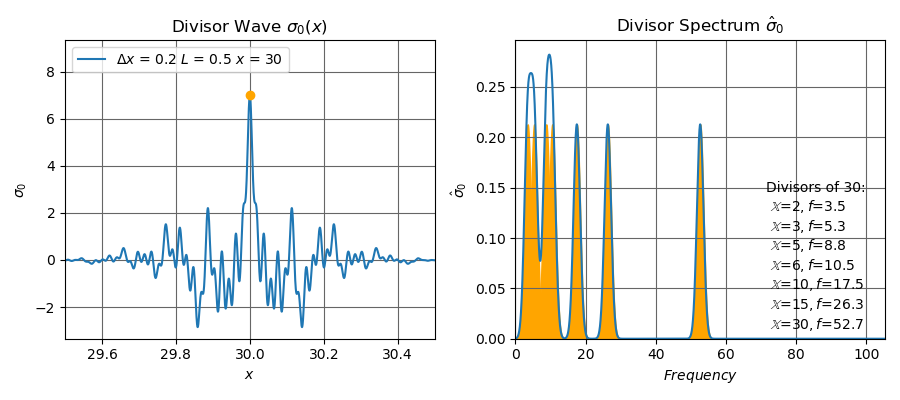

Options: L is pulse height at dx, Audio is from Real Part.
Orange dot in Wave graph indicates divisor count of: x
Blue line in spectrum indicates total spectrum


interactive(children=(Dropdown(description='$\\Delta x$:', index=2, options=(0.1, 0.15, 0.2, 0.25, 0.3, 0.35, …

In [3]:
fig, ax2= plt2.subplots(1,2, figsize=(9, 4))
    
def update_plot(dx2, L2, sx):
    
    xf=np.linspace(sx-0.5,sx+0.5,2000,endpoint=True)

    ax2[0].clear()
    ax2[1].clear()
    
    reD=[0]*2000
    #imD=[0]*2000
    
    #Create list with waves X=2 to X=100
    wave2=list(range(2,101))
    
    #Calculate Solution Wave Devisor Function
    for w2 in wave2:
  
        N2=(np.log(L2))/(np.log(np.cos(np.pi*dx2/w2)))
        N2=2*round(0.5*N2,0)
        
        reDw = ((np.cos(xf*np.pi/w2))**N2)*(np.cos(np.pi*N2*xf/w2))
        #imDw = (-(np.cos(xf*np.pi/w2))**N2)*(np.sin(np.pi*N2*xf/w2))

        reD=list(map(add, reD, reDw))
        #imD=list(map(add, imD, imDw))

    #Determine maximum Divisor Count
    countD=max(reD)

    #Plot Divisor Function
    units2 = '$\Delta x$ = {} $L$ = {} $x$ = {}'
    ax2[0].plot(xf, reD,color='#1f77b4', label=units2.format(dx2, L2, sx))
    ax2[0].plot([sx],[countD], color='orange', marker='o')
    ax2[0].legend(loc=2)
    ax2[0].set_title('Divisor Wave $\sigma_{0}(x)$')
    ax2[0].set_xlabel('$x$')
    ax2[0].set_ylabel('$\sigma_{0}$')
    ax2[0].axis([(sx-0.5), (sx+0.5), None,(countD+countD/3)])
    ax2[0].grid(b=True, which='major', color='#666666', linestyle='-')
 
    #Calculate Fourier Transform set amplitude summation 0.
    ampliS=[0]*10000
    
    #Maximum Frequency Range
    N2=-2*(sx**2)*np.log(L2)/((np.pi**2)*(dx2**2))
    N2=2*round(0.5*N2,0)
    fmax=N2/sx
    frange=np.linspace(-fmax,fmax,10000)

    #Fourier Transform Calculated. Create graph label.
    lab='Divisors of ' + str(sx) +':'
    
    for w2 in wave2:
 
        #Determine coeficients: a, b calculate Fourier Transform.
        N2=(np.log(L2))/(np.log(np.cos(np.pi*dx2/w2)))
        N2=2*round(0.5*N2,0)
        a=np.log(L2)/(dx2**2)
        b=np.pi*N2/w2
        #b=-w2*(2/np.pi)*np.log(L2)/(dx2**2)
        
        
        #Only add waves from divisors of x (modules).
        if (sx%w2)==0:
            Spec = (np.sqrt(np.pi))/(2*np.sqrt(-a))*(np.exp(((b-2*np.pi*frange)**2)/(4*a)) + np.exp(((b+2*np.pi*frange)**2)/(4*a)))
            ampliS=list(map(add, ampliS, Spec))
            lab=lab+'\n $\mathbb{X}$='+str(w2) + '$, f$='+str(np.round(0.5*N2/w2,1)) 
            
            #Plot individual divisor frequencies
            ax2[1].fill_between(frange,Spec, color='orange')

    #Plot summation frequencies.
    ax2[1].set_title('Divisor Spectrum $\hat{\sigma}_{0}$')
    ax2[1].annotate(lab, xy=(fmax-fmax/3.1,0.01))
    ax2[1].plot(frange, ampliS,color='#1f77b4')
    ax2[1].set_xlabel('$Frequency$')
    ax2[1].set_ylabel('$\hat{\sigma}_{0}$')
    ax2[1].axis([0,fmax, 0,None]) 
    ax2[1].grid(b=True, which='major', color='#666666', linestyle='-')
    
    plt2.tight_layout()
    plt2.show()
    
    print(np.sqrt(-a*2))
    
    #Create Audiofile
    display(Audio(reD, rate=20000))
    #display(Audio(imD, rate=12000))

print('Options: L is pulse height at dx, Audio is from Real Part.')
print('Orange dot in Wave graph indicates divisor count of: x')
print('Blue line in spectrum indicates total spectrum')

dx2 = widgets.Dropdown(options=[0.10,0.15, 0.20,0.25,0.30,0.35,0.40,0.45,0.5], value=0.2, description='$\Delta x$:')  
L2 = widgets.Dropdown(options=[0.10,0.15, 0.20,0.25,0.30,0.35,0.40,0.45,0.5], value=0.5, description='$L$:') 
sx = widgets.Dropdown(options=list(range(2,101)), description='$x$:',value=30)   

widgets.interactive(update_plot, dx2=dx2, L2=L2, sx=sx)

# Audio Wave Divisor Function.

An movie has been created where the divisor function and audio are synchronized. The movie has been created in the range till x=1000. The displayed movie below is done with the following settings: dx=0.15, L=0.5, Rate=3000, BPM=600. For other settings see my youtube channel.

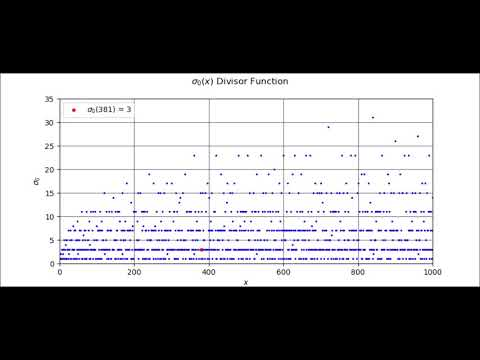

In [4]:
from IPython.display import YouTubeVideo

#Wave divisor function audio
YouTubeVideo('5oWcu_Qjdn0')

# Properties Frequency Spectrum (uncertainty principle).

When the pulsewidth in the time domain gets smaller the frequency spectrum of the divisors tend to be identified more clear. From Fourier transform properties one would expect the frequency bandwidth to become wider as the time domain pulse gets narrow: [Uncertainty principle][1].

The spectrum of the wave divisor function seems to behave opposite to the uncertainty principle. Below the [z-score][2] of the wave divisor spectra is calculated. The z-score describes the behaviour and the uncertainty principle is maintained. 

Time domain $f(x)$:

$$\large \Re(\sigma_{0})\rightarrow \sum_{\mathbb{X}=2}^{\infty}e^{a x^{2}} \cos (b x) $$

The pulsewidth in the time domain is determined by: $L$ pulseheight at position $\Delta x$. In the equations described later we will vary the pulsewidth in the time domain. Onward we set $L=0.5$ as an constant and the time domain pulsewidth is varied by reducing $\Delta x \rightarrow 0$. 

$$\large a=\frac{\log(L) }{\Delta x^{2}}=constant$$

$$\large b(\mathbb{X}) = \frac{N}{\mathbb{X}}\pi \approx  - \frac{2  \log(L)}{\pi  \Delta x^{2}} \mathbb{X} = constant \cdot \mathbb{X}$$

Frequency domain $\hat{f} (\xi)$:

$$\large \hat{\sigma}_{0}(\xi)= \frac{\sqrt{\pi}}{2 \sqrt{-a}} \left( e^{(b-2  \pi  \xi)^{2} /4a}    + e^{(b+2 \pi \xi)^{2} /4a}       \right) $$

The frequency pulses can be seen as [normal distributions][3] . The standard deviation of a pulse in the frequency domain is proportional to:

$$\large Stdev(\hat{\sigma}_{0}(\xi)) \propto \sqrt{-a}$$

The minimal frequency distance between two neigbour pulses is:

$$\large \Delta \xi = b(\mathbb{X}+1)-b(\mathbb{X})=b(1)$$

The z-score between to neighbour frequency pulses then is:

$$\large Z \propto \frac{b(1)}{\sqrt{-a}} \propto \frac{1}{\Delta x}$$

When the time domain pulse gets narrow $\Delta x \rightarrow 0$ the $z-score$ in the frequency domain gets bigger. Thus the individual pulses in the frequency domain become better identified. One can say that the pulsewidth in frequency domain $\sqrt{-a}$ grows more slowly then the frequency difference between two neighbour divisors $b$.


More information: [Uncertainty principle][1], [z-score][2]


[1]: https://en.wikipedia.org/wiki/Fourier_transform#Uncertainty_principle
[2]: https://en.wikipedia.org/wiki/Standard_score
[3]: https://en.wikipedia.org/wiki/Normal_distribution
